# Pre-processing of test and train csv

In [2]:
import pandas as pd

# Define the file path
train_file_path = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/merged_train.csv"
test_file_path = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/merged_test.csv"

# Load merged train and test data
try:
    train_df = pd.read_csv(train_file_path)
    print("Train DataFrame:")
    print(train_df.head())
except FileNotFoundError as e:
    print(f"Error: {e}")



Train DataFrame:
  iataCode icaoCode terminal            scheduledTime  \
0       sv      sva        4  2023-07-20t23:20:00.000   
1       9p      fjl      NaN  2023-07-18t16:50:00.000   
2       9p      fjl      NaN  2023-07-23t11:35:00.000   
3       pk      pia        m  2023-07-27t01:30:00.000   
4       er      sep        1  2023-07-20t14:00:00.000   

             estimatedTime               actualTime          estimatedRunway  \
0  2023-07-20t21:54:00.000  2023-07-20t20:15:00.000  2023-07-20t20:15:00.000   
1  2023-07-18t15:05:00.000                      NaN                      NaN   
2                      NaN                      NaN                      NaN   
3  2023-07-27t01:24:00.000  2023-07-26t23:51:00.000  2023-07-26t23:51:00.000   
4  2023-07-20t17:15:00.000                      NaN                      NaN   

              actualRunway                             name  number  \
0  2023-07-20t20:15:00.000                           saudia     737   
1                

In [3]:
try:
    test_df = pd.read_csv(test_file_path)
    print("Test DataFrame:")
    print(test_df.head())
except FileNotFoundError as e:
    print(f"Error: {e}")

Test DataFrame:
  iataCode icaoCode            scheduledTime          estimatedRunway  \
0       9p      fjl  2023-07-17t22:20:00.000  2023-07-17t20:46:00.000   
1       pk      pia  2023-07-27t10:00:00.000                      NaN   
2       et      eth  2023-07-27t10:00:00.000                      NaN   
3       pa      abq  2023-07-28t20:30:00.000                      NaN   
4       kl      klm  2023-07-19t06:35:00.000  2023-07-19t04:18:00.000   

              actualRunway            estimatedTime  \
0  2023-07-17t20:46:00.000  2023-07-17t22:12:00.000   
1                      NaN                      NaN   
2                      NaN                      NaN   
3                      NaN                      NaN   
4  2023-07-19t04:18:00.000  2023-07-19t06:08:00.000   

                              name  number iataNumber icaoNumber terminal  \
0                        flyjinnah     847      9p847     fjl847      NaN   
1  pakistan international airlines     725      pk725     pi

In [4]:
# Check for missing values in train and test datasets
print(train_df.isnull().sum())
print(test_df.isnull().sum())

# Fill missing values if needed, for example with an empty string or a placeholder
train_df.fillna('', inplace=True)
test_df.fillna('', inplace=True)

# Optionally, drop rows with too many missing values
train_df.dropna(thresh=len(train_df.columns)-1, inplace=True)
test_df.dropna(thresh=len(test_df.columns)-1, inplace=True)


iataCode                29
icaoCode                 0
terminal             14484
scheduledTime            0
estimatedTime         5888
actualTime           20582
estimatedRunway      20582
actualRunway         20582
name                     0
number                   0
iataNumber              29
icaoNumber               0
baggage              33454
airline.name         35689
airline.iataCode     35689
airline.icaoCode     35689
flight.number        35689
flight.iataNumber    35689
flight.icaoNumber    35689
gate                 47005
dtype: int64
iataCode                 6
icaoCode                 1
scheduledTime            0
estimatedRunway       6215
actualRunway          6215
estimatedTime         6515
name                     0
number                   0
iataNumber               6
icaoNumber               1
terminal              4183
baggage               9629
airline.name         10247
airline.iataCode     10247
airline.icaoCode     10247
flight.number        10247
flight.iataNumb

Conversion to DateTime stamp

In [5]:
train_df['scheduledTime'] = pd.to_datetime(train_df['scheduledTime'], errors='coerce')
test_df['scheduledTime'] = pd.to_datetime(test_df['scheduledTime'], errors='coerce')

train_df['estimatedTime'] = pd.to_datetime(train_df['estimatedTime'], errors='coerce')
test_df['estimatedTime'] = pd.to_datetime(test_df['estimatedTime'], errors='coerce')

train_df['actualTime'] = pd.to_datetime(train_df['actualTime'], errors='coerce')
test_df['actualTime'] = pd.to_datetime(test_df['actualTime'], errors='coerce')

train_df['estimatedRunway'] = pd.to_datetime(train_df['estimatedRunway'], errors='coerce')
test_df['estimatedRunway'] = pd.to_datetime(test_df['estimatedRunway'], errors='coerce')

train_df['actualRunway'] = pd.to_datetime(train_df['actualRunway'], errors='coerce')
test_df['actualRunway'] = pd.to_datetime(test_df['actualRunway'], errors='coerce')

train_df['baggage'] = train_df['baggage'].apply(pd.to_numeric, errors='coerce')
test_df['baggage'] = test_df['baggage'].apply(pd.to_numeric, errors='coerce')


In [6]:
train_df.head(20)

,iataCode,icaoCode,terminal,scheduledTime,estimatedTime,actualTime,estimatedRunway,actualRunway,name,number,iataNumber,icaoNumber,baggage,airline.name,airline.iataCode,airline.icaoCode,flight.number,flight.iataNumber,flight.icaoNumber,gate
0,sv,sva,4,2023-07-20 23:20:00,2023-07-20 21:54:00,2023-07-20 20:15:00,2023-07-20 20:15:00,2023-07-20 20:15:00,saudia,737,sv737,sva737,NaN,,,,,,,
1,9p,fjl,,2023-07-18 16:50:00,2023-07-18 15:05:00,NaT,NaT,NaT,flyjinnah,843,9p843,fjl843,NaN,,,,,,,
2,9p,fjl,,2023-07-23 11:35:00,NaT,NaT,NaT,NaT,flyjinnah,841,9p841,fjl841,NaN,,,,,,,
3,pk,pia,m,2023-07-27 01:30:00,2023-07-27 01:24:00,2023-07-26 23:51:00,2023-07-26 23:51:00,2023-07-26 23:51:00,pakistan international airlines,205,pk205,pia205,NaN,,,,,,,
4,er,sep,1,2023-07-20 14:00:00,2023-07-20 17:15:00,NaT,NaT,NaT,serene air,723,er723,sep723,3.0,,,,,,,
5,pa,abq,m,2023-07-28 10:55:00,2023-07-28 09:00:00,NaT,NaT,NaT,airblue,401,pa401,abq401,NaN,,,,,,,
6,sv,sva,1,2023-07-23 14:50:00,2023-07-23 11:40:00,NaT,NaT,NaT,saudia,735,sv735,sva735,NaN,,,,,,,
7,ib,ibe,m,2023-07-16 11:55:00,2023-07-16 09:25:00,NaT,NaT,NaT,iberia,7915,ib7915,ibe7915,3.0,qatar airways,qr,qtr,629.0,qr629,qtr629,
8,yg,hyt,,2023-07-31 05:00:00,NaT,NaT,NaT,NaT,yto cargo airlines,9090,yg9090,hyt9090,NaN,,,,,,,
9,er,sep,m,2023-07-22 22:15:00,NaT,NaT,NaT,NaT,serene air,525,er525,sep525,NaN,,,,,,,


In [7]:
test_df.head()

,iataCode,icaoCode,scheduledTime,estimatedRunway,actualRunway,estimatedTime,name,number,iataNumber,icaoNumber,terminal,baggage,airline.name,airline.iataCode,airline.icaoCode,flight.number,flight.iataNumber,flight.icaoNumber,gate,actualTime
0,9p,fjl,2023-07-17 22:20:00,2023-07-17 20:46:00,2023-07-17 20:46:00,2023-07-17 22:12:00,flyjinnah,847,9p847,fjl847,,NaN,,,,,,,,NaT
1,pk,pia,2023-07-27 10:00:00,NaT,NaT,NaT,pakistan international airlines,725,pk725,pia725,t2,NaN,,,,,,,,NaT
2,et,eth,2023-07-27 10:00:00,NaT,NaT,NaT,ethiopian airlines,4359,et4359,eth4359,1,2.0,pakistan international airlines,pk,pia,203.0,pk203,pia203,,NaT
3,pa,abq,2023-07-28 20:30:00,NaT,NaT,NaT,airblue,470,pa470,abq470,m,NaN,,,,,,,,NaT
4,kl,klm,2023-07-19 06:35:00,2023-07-19 04:18:00,2023-07-19 04:18:00,2023-07-19 06:08:00,klm,3932,kl3932,klm3932,3,NaN,etihad airways,ey,etd,242.0,ey242,etd242,70,NaT


----------------Preprocessed Train and Test Data---------------

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Step 1: Handle Missing Values
def handle_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # Categorical columns
            df[column].fillna('Unknown', inplace=True)
        else:  # Numerical columns
            df[column].fillna(0, inplace=True)  # Fill numerical with 0

# Apply to train and test datasets
handle_missing_values(train_df)
handle_missing_values(test_df)


In [9]:
# Step 3: Scale Numerical Features
scaler = StandardScaler()
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns

# Fit the scaler on the train data and transform both train and test data
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.fit_transform(test_df[numerical_columns])

# Check for missing values after preprocessing
print("\nMissing values in train_df after preprocessing:")
print(train_df.isnull().sum())

print("\nMissing values in test_df after preprocessing:")
print(test_df.isnull().sum())

# Display the first few rows of the preprocessed datasets
print("\nPreprocessed train_df:")
print(train_df.head())

print("\nPreprocessed test_df:")
print(test_df.head())


Missing values in train_df after preprocessing:
iataCode             0
icaoCode             0
terminal             0
scheduledTime        0
estimatedTime        0
actualTime           0
estimatedRunway      0
actualRunway         0
name                 0
number               0
iataNumber           0
icaoNumber           0
baggage              0
airline.name         0
airline.iataCode     0
airline.icaoCode     0
flight.number        0
flight.iataNumber    0
flight.icaoNumber    0
gate                 0
dtype: int64

Missing values in test_df after preprocessing:
iataCode             0
icaoCode             0
scheduledTime        0
estimatedRunway      0
actualRunway         0
estimatedTime        0
name                 0
number               0
iataNumber           0
icaoNumber           0
terminal             0
baggage              0
airline.name         0
airline.iataCode     0
airline.icaoCode     0
flight.number        0
flight.iataNumber    0
flight.icaoNumber    0
gate            

In [10]:
test_df.columns

Index(['iataCode', 'icaoCode', 'scheduledTime', 'estimatedRunway',
       'actualRunway', 'estimatedTime', 'name', 'number', 'iataNumber',
       'icaoNumber', 'terminal', 'baggage', 'airline.name', 'airline.iataCode',
       'airline.icaoCode', 'flight.number', 'flight.iataNumber',
       'flight.icaoNumber', 'gate', 'actualTime'],
      dtype='object')

In [11]:
train_df.columns

Index(['iataCode', 'icaoCode', 'terminal', 'scheduledTime', 'estimatedTime',
       'actualTime', 'estimatedRunway', 'actualRunway', 'name', 'number',
       'iataNumber', 'icaoNumber', 'baggage', 'airline.name',
       'airline.iataCode', 'airline.icaoCode', 'flight.number',
       'flight.iataNumber', 'flight.icaoNumber', 'gate'],
      dtype='object')

In [12]:
columns_to_remove = ['terminal', 'baggage', 'airline.name', 'airline.iataCode', 
                     'airline.icaoCode', 'flight.number', 'flight.iataNumber', 
                     'flight.icaoNumber', 'gate']

# Remove columns in place
test_df.drop(columns=columns_to_remove, inplace=True)
train_df.drop(columns=columns_to_remove, inplace=True)

In [13]:
train_df.to_csv("C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/preprocessed_train.csv", index=False)
test_df.to_csv("C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/preprocessed_test.csv", index=False)


In [14]:
preprocessed_train_data = pd.read_csv("C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/preprocessed_train.csv")
preprocessed_test_data = pd.read_csv("C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/preprocessed_test.csv")

In [15]:
preprocessed_train_data = pd.DataFrame(preprocessed_train_data)
preprocessed_test_data = pd.DataFrame(preprocessed_test_data)

In [16]:
preprocessed_train_data.columns


Index(['iataCode', 'icaoCode', 'scheduledTime', 'estimatedTime', 'actualTime',
       'estimatedRunway', 'actualRunway', 'name', 'number', 'iataNumber',
       'icaoNumber'],
      dtype='object')

In [17]:
preprocessed_test_data.columns

Index(['iataCode', 'icaoCode', 'scheduledTime', 'estimatedRunway',
       'actualRunway', 'estimatedTime', 'name', 'number', 'iataNumber',
       'icaoNumber', 'actualTime'],
      dtype='object')

---------------PreProcessed Weather Data---------------

In [18]:
merged_weather_file = pd.read_csv("C:/Users/GB/Documents/ML-Proj-Dataset/MergeCsvWeather/merged_weather.csv")

In [19]:
merged_weather_file = pd.DataFrame(merged_weather_file)
print(merged_weather_file.columns)

Index(['Temperature (Â°F) Max', 'Temperature (Â°F) Avg',
       'Temperature (Â°F) Min', 'Dew Point (Â°F) Max', 'Dew Point (Â°F) Avg',
       'Dew Point (Â°F) Min', 'Humidity (%) Max', 'Humidity (%) Avg',
       'Humidity (%) Min', 'Wind Speed (mph) Max', 'Wind Speed (mph) Avg',
       'Wind Speed (mph) Min', 'Pressure (in) Max', 'Pressure (in) Avg',
       'Pressure (in) Min', 'Precipitation (in)', 'datetime'],
      dtype='object')


-----Change column names for preprocessing---

In [20]:
merged_weather_file.rename(columns={
    'Temperature (Â°F) Max': 'Max Temperature (°F)',
    'Temperature (Â°F) Avg': 'Average Temperature (°F)',
    'Temperature (Â°F) Min': 'Min Temperature (°F)',
    'Dew Point (Â°F) Max': 'Max Dew Point (°F)',
    'Dew Point (Â°F) Avg': 'Average Dew Point (°F)',
    'Dew Point (Â°F) Min': 'Min Dew Point (°F)',
    'Humidity (%) Max': 'Max Humidity (%)',
    'Humidity (%) Avg': 'Average Humidity (%)',
    'Humidity (%) Min': 'Min Humidity (%)',
    'Wind Speed (mph) Max': 'Max Wind Speed (mph)',
    'Wind Speed (mph) Avg': 'Average Wind Speed (mph)',
    'Wind Speed (mph) Min': 'Min Wind Speed (mph)',
    'Pressure (in) Max': 'Max Pressure (in)',
    'Pressure (in) Avg': 'Average Pressure (in)',
    'Pressure (in) Min': 'Min Pressure (in)',
    'Precipitation (in)': 'Total Precipitation (in)',
    'datetime': 'Date and Time'
}, inplace=True)

print(merged_weather_file.head())

   Max Temperature (°F)  Average Temperature (°F)  Min Temperature (°F)  \
0                  97.0                      88.8                  81.0   
1                  99.0                      91.5                  82.0   
2                 102.0                      91.7                  77.0   
3                  97.0                      88.5                  81.0   
4                  86.0                      76.0                  68.0   

   Max Dew Point (°F)  Average Dew Point (°F)  Min Dew Point (°F)  \
0                77.0                    74.5                72.0   
1                79.0                    75.8                75.0   
2                81.0                    77.0                73.0   
3                77.0                    74.3                73.0   
4                79.0                    72.9                68.0   

   Max Humidity (%)  Average Humidity (%)  Min Humidity (%)  \
0              74.0                  63.4              47.0   
1       

In [21]:
# Step 1: Clean column names
merged_weather_file.columns = (
    merged_weather_file.columns
    .str.replace(" ", "_", regex=False)
    .str.replace("°F", "F", regex=False)
    .str.replace("(", "", regex=False)
    .str.replace(")", "", regex=False)
    .str.lower()
)

# Check the updated column names
print(merged_weather_file.columns)

# Step 2: Replace zeros with NaN in relevant columns
columns_with_zeros = ['min_temperature_f', 'min_dew_point_f', 'min_wind_speed_mph', 'min_pressure_in']
merged_weather_file[columns_with_zeros] = merged_weather_file[columns_with_zeros].replace(0, pd.NA)


Index(['max_temperature_f', 'average_temperature_f', 'min_temperature_f',
       'max_dew_point_f', 'average_dew_point_f', 'min_dew_point_f',
       'max_humidity_%', 'average_humidity_%', 'min_humidity_%',
       'max_wind_speed_mph', 'average_wind_speed_mph', 'min_wind_speed_mph',
       'max_pressure_in', 'average_pressure_in', 'min_pressure_in',
       'total_precipitation_in', 'date_and_time'],
      dtype='object')


In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

columns_with_outliers = ['max_wind_speed_mph', 'min_pressure_in']
merged_weather_file[columns_with_outliers] = merged_weather_file[columns_with_outliers].apply(cap_outliers)

merged_weather_file = merged_weather_file.drop(columns=['total_precipitation_in'])


numerical_columns = merged_weather_file.select_dtypes(include=['float64']).columns
scaler = MinMaxScaler()
merged_weather_file[numerical_columns] = scaler.fit_transform(merged_weather_file[numerical_columns])

merged_weather_file['date_and_time'] = pd.to_datetime(merged_weather_file['date_and_time'], errors='coerce')

print(merged_weather_file.head())

   max_temperature_f  average_temperature_f min_temperature_f  \
0           0.731343               0.783002              81.0   
1           0.761194               0.831826              82.0   
2           0.805970               0.835443              77.0   
3           0.731343               0.777577              81.0   
4           0.567164               0.551537              68.0   

   max_dew_point_f  average_dew_point_f min_dew_point_f  max_humidity_%  \
0         0.837209             0.866029            72.0        0.566667   
1         0.883721             0.897129            75.0        0.650000   
2         0.930233             0.925837            73.0        1.000000   
3         0.837209             0.861244            73.0        0.650000   
4         0.883721             0.827751            68.0        1.000000   

   average_humidity_%  min_humidity_%  max_wind_speed_mph  \
0            0.562331        0.540230            0.383562   
1            0.533875        0.54023

In [23]:
merged_weather_file.to_csv("C:/Users/GB/Documents/ML-Proj-Dataset/MergeCsvWeather/preprocessed_weather.csv", index=False)


Integrate Flight data with Weather

In [24]:
import pandas as pd

def integrate_weather_with_flight_and_calculate_delay(flight_file, weather_file, output_file):

    flight_data = pd.read_csv(flight_file)
    weather_data = pd.read_csv(weather_file)

    flight_data['scheduledTime'] = pd.to_datetime(flight_data['scheduledTime'], errors='coerce')
    flight_data['actualTime'] = pd.to_datetime(flight_data['actualTime'], errors='coerce')
    weather_data['date_and_time'] = pd.to_datetime(weather_data['date_and_time'], errors='coerce')

    flight_data = flight_data.sort_values(by='scheduledTime')
    weather_data = weather_data.sort_values(by='date_and_time')

    merged_data = pd.merge_asof(
        flight_data,
        weather_data,
        left_on='scheduledTime',
        right_on='date_and_time',
        direction='nearest'
    )

    merged_data.drop(columns=['date_and_time'], inplace=True)

    # Calculate delay duration in minutes
    merged_data['delay_duration'] = (
        (merged_data['actualTime'] - merged_data['scheduledTime'])
        .dt.total_seconds() / 60
    )

    merged_data['delay_duration'] = merged_data['delay_duration'].fillna(0).clip(lower=0)

    merged_data.to_csv(output_file, index=False)
    print(f"Integrated data with delays saved to {output_file}")




In [25]:
# File paths
train_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/preprocessed_train.csv"
test_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/preprocessed_test.csv"
weather_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeCsvWeather/preprocessed_weather.csv"

output_train_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/integrated_train.csv"
output_test_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/integrated_test.csv"

# Process train and test datasets
integrate_weather_with_flight_and_calculate_delay(train_file, weather_file, output_train_file)
integrate_weather_with_flight_and_calculate_delay(test_file, weather_file, output_test_file)


Integrated data with delays saved to C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/integrated_train.csv


C:\Users\GB\AppData\Local\Temp\ipykernel_3040\3482685586.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_data['actualTime'] = pd.to_datetime(flight_data['actualTime'], errors='coerce')


Integrated data with delays saved to C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/integrated_test.csv


# ---------
# PHASE 2 EDA
# --------

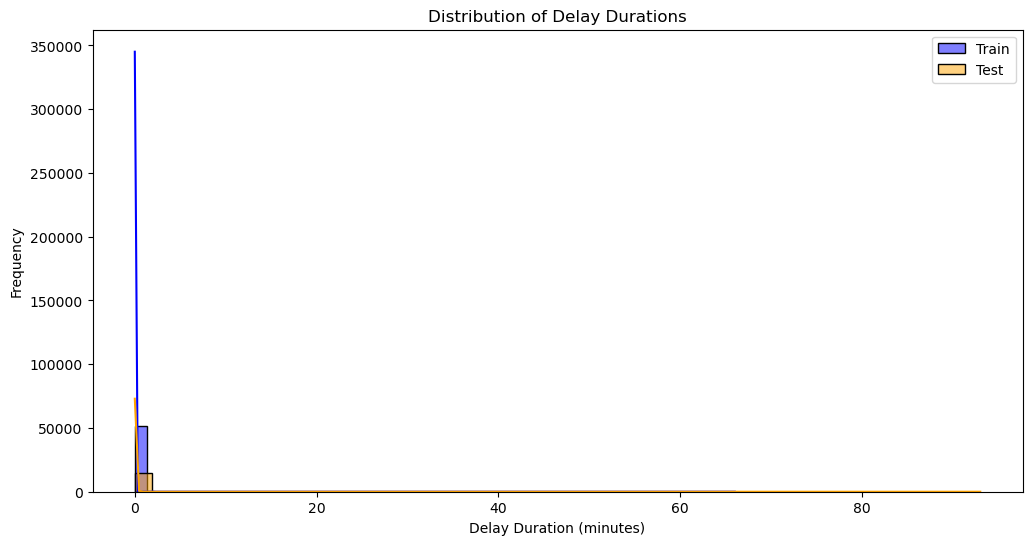

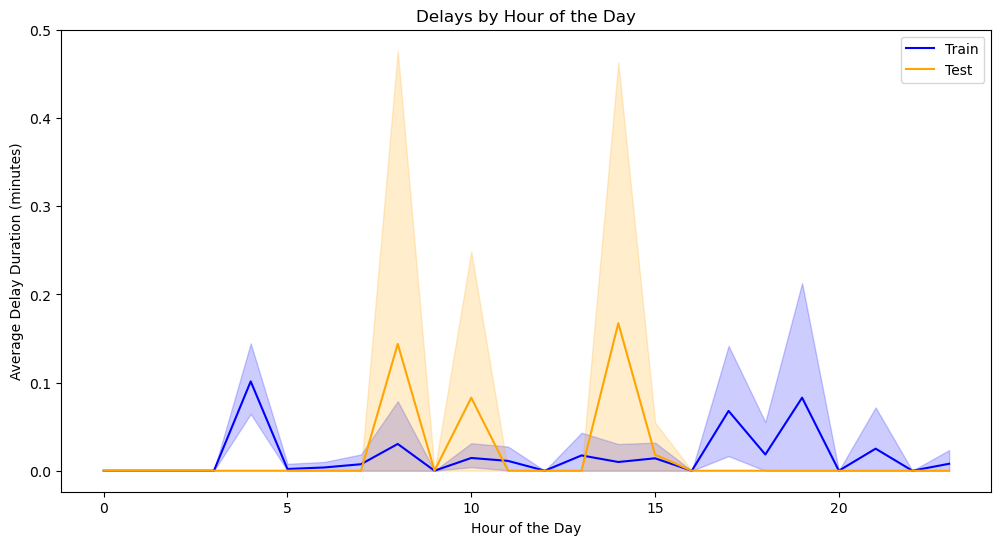

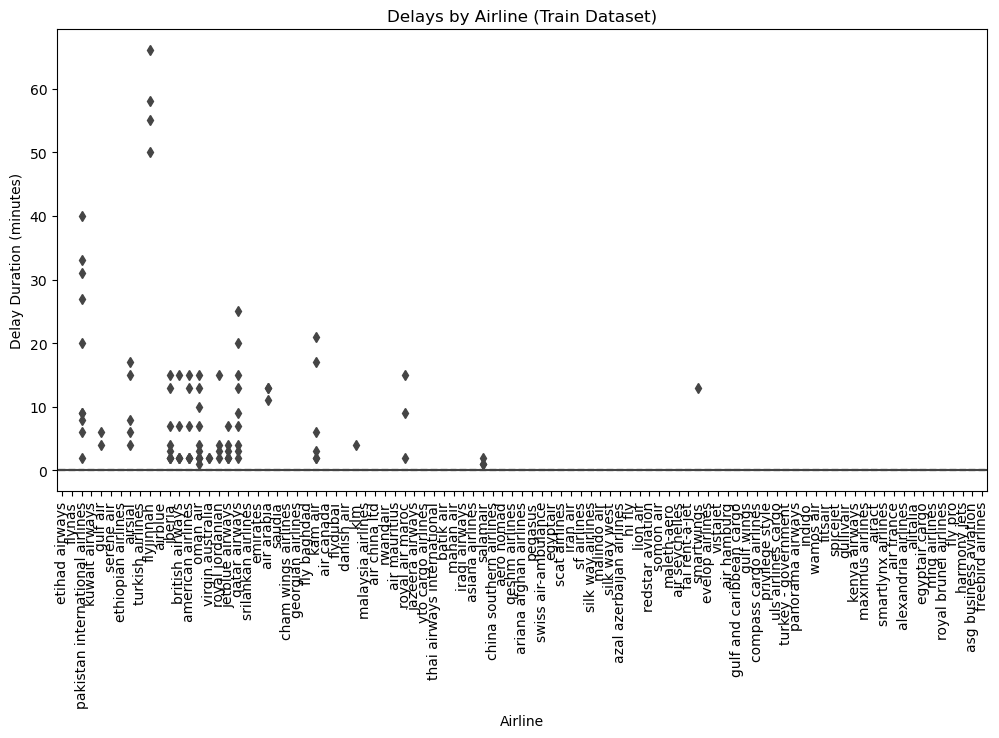

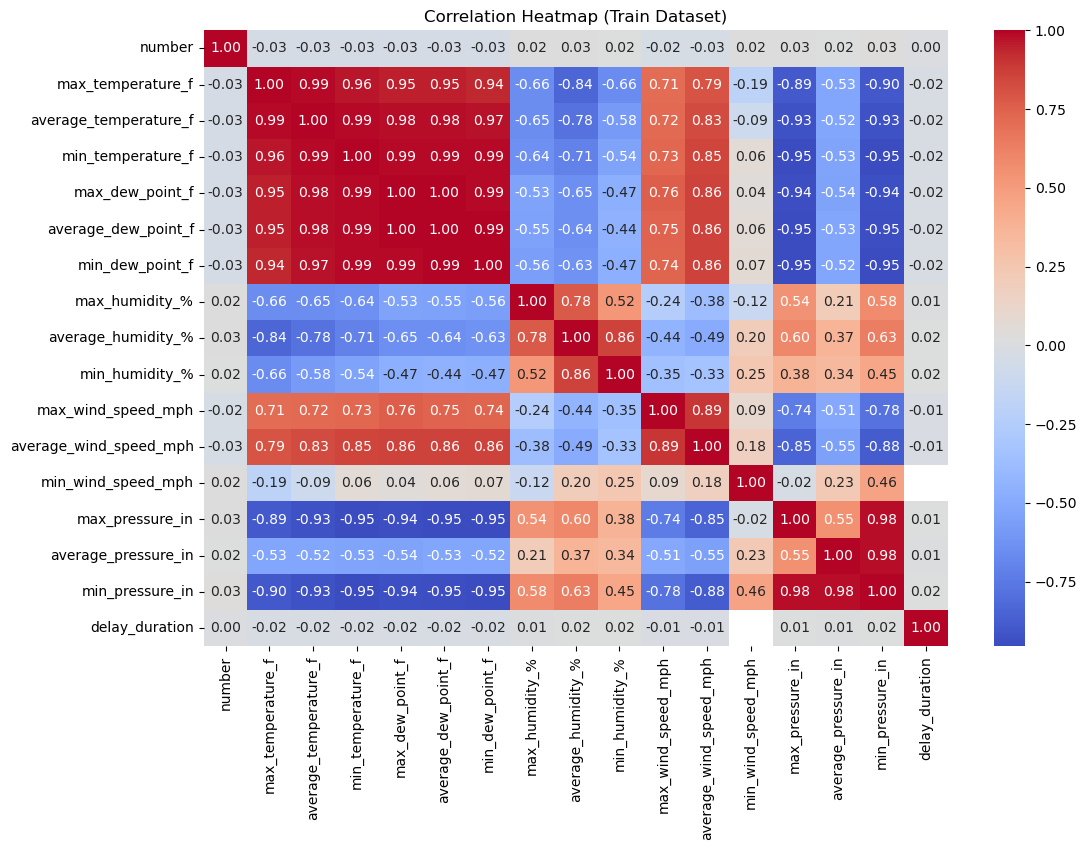

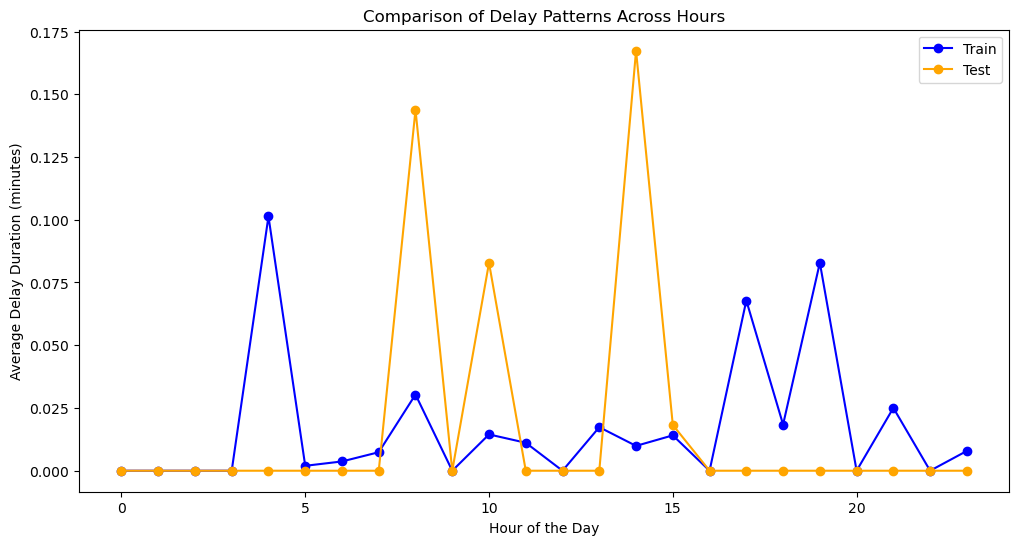

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def eda_visualizations(train_file, test_file):

    train_data = pd.read_csv(train_file)
    test_data = pd.read_csv(test_file)

    if 'scheduledTime' in train_data.columns:
        train_data['scheduledTime'] = pd.to_datetime(train_data['scheduledTime'], errors='coerce')
        train_data['scheduled_hour'] = train_data['scheduledTime'].dt.hour
        train_data['scheduled_day_of_week'] = train_data['scheduledTime'].dt.day_name()
        train_data['scheduled_month'] = train_data['scheduledTime'].dt.month
    else:
        print("Error: 'scheduledTime' column not found in the training dataset")

    if 'scheduledTime' in test_data.columns:
        test_data['scheduledTime'] = pd.to_datetime(test_data['scheduledTime'], errors='coerce')
        test_data['scheduled_hour'] = test_data['scheduledTime'].dt.hour
        test_data['scheduled_day_of_week'] = test_data['scheduledTime'].dt.day_name()
        test_data['scheduled_month'] = test_data['scheduledTime'].dt.month
    else:
        print("Error: 'scheduledTime' column not found in the testing dataset")

    # Delay Distributions
    plt.figure(figsize=(12, 6))
    sns.histplot(train_data['delay_duration'], bins=50, kde=True, color='blue', label='Train')
    sns.histplot(test_data['delay_duration'], bins=50, kde=True, color='orange', label='Test')
    plt.title('Distribution of Delay Durations')
    plt.xlabel('Delay Duration (minutes)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Temporal Analysis: Delays by Hour
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=train_data['scheduled_hour'], y=train_data['delay_duration'], label='Train', color='blue')
    sns.lineplot(x=test_data['scheduled_hour'], y=test_data['delay_duration'], label='Test', color='orange')
    plt.title('Delays by Hour of the Day')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Delay Duration (minutes)')
    plt.legend()
    plt.show()

    # Category-Wise Analysis: Delays by Airline
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='name', y='delay_duration', data=train_data)
    plt.xticks(rotation=90)
    plt.title('Delays by Airline (Train Dataset)')
    plt.xlabel('Airline')
    plt.ylabel('Delay Duration (minutes)')
    plt.show()

# Correlation Analysis: Heatmap (Only numerical columns)
    plt.figure(figsize=(12, 8))
    numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
    correlation = train_data[numerical_cols].corr()  # Only numerical columns
    sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title('Correlation Heatmap (Train Dataset)')
    plt.show()

    # Correlation Analysis: Scatter Plot (Weather vs Delays)
    if 'Temperature_Max_F' in train_data.columns:
        plt.figure(figsize=(12, 6))
        sns.scatterplot(x='Temperature_Max_F', y='delay_duration', data=train_data, color='green', label='Temperature')
        plt.title('Temperature vs Delay Duration')
        plt.xlabel('Temperature (°F)')
        plt.ylabel('Delay Duration (minutes)')
        plt.show()

    # Comparison of Delay Patterns
    plt.figure(figsize=(12, 6))
    train_avg_delays = train_data.groupby('scheduled_hour')['delay_duration'].mean()
    test_avg_delays = test_data.groupby('scheduled_hour')['delay_duration'].mean()
    plt.plot(train_avg_delays.index, train_avg_delays.values, label='Train', color='blue', marker='o')
    plt.plot(test_avg_delays.index, test_avg_delays.values, label='Test', color='orange', marker='o')
    plt.title('Comparison of Delay Patterns Across Hours')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Delay Duration (minutes)')
    plt.legend()
    plt.show()


# Paths to the datasets
train_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/integrated_train.csv"
test_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/integrated_test.csv"

# Perform EDA visualizations
eda_visualizations(train_file, test_file)


# --------
# PHASE 3 STARTED
# -------

BINARY CLASSIFICATION:

In [217]:
train_data = pd.read_csv("C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/integrated_train.csv")
print("train integrated data")
train_data.columns

train integrated data


Index(['iataCode', 'icaoCode', 'scheduledTime', 'estimatedTime', 'actualTime',
       'estimatedRunway', 'actualRunway', 'name', 'number', 'iataNumber',
       'icaoNumber', 'max_temperature_f', 'average_temperature_f',
       'min_temperature_f', 'max_dew_point_f', 'average_dew_point_f',
       'min_dew_point_f', 'max_humidity_%', 'average_humidity_%',
       'min_humidity_%', 'max_wind_speed_mph', 'average_wind_speed_mph',
       'min_wind_speed_mph', 'max_pressure_in', 'average_pressure_in',
       'min_pressure_in', 'delay_duration'],
      dtype='object')

------Preprocess integrated csv for binary Classification-----

In [175]:
test_data = pd.read_csv("C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/integrated_test.csv")
print("test integrated data")
test_data.columns

test integrated data


Index(['iataCode', 'icaoCode', 'scheduledTime', 'estimatedRunway',
       'actualRunway', 'estimatedTime', 'name', 'number', 'iataNumber',
       'icaoNumber', 'actualTime', 'max_temperature_f',
       'average_temperature_f', 'min_temperature_f', 'max_dew_point_f',
       'average_dew_point_f', 'min_dew_point_f', 'max_humidity_%',
       'average_humidity_%', 'min_humidity_%', 'max_wind_speed_mph',
       'average_wind_speed_mph', 'min_wind_speed_mph', 'max_pressure_in',
       'average_pressure_in', 'min_pressure_in', 'delay_duration'],
      dtype='object')

In [218]:
relevant_columns = [
    'iataCode', 'icaoCode', 'scheduledTime', 'actualTime', 'estimatedRunway', 'actualRunway', 'name',
    'max_temperature_f', 'average_temperature_f', 'min_temperature_f',
    'max_dew_point_f', 'average_dew_point_f', 'min_dew_point_f',
    'max_humidity_%', 'average_humidity_%', 'min_humidity_%',
    'max_wind_speed_mph', 'average_wind_speed_mph', 'min_wind_speed_mph',
    'max_pressure_in', 'average_pressure_in', 'min_pressure_in',
    'delay_duration'
]

def remove_unnecessary_columns(input_file, output_file, relevant_columns):
    """
    Remove unnecessary columns from the dataset and save the result.

    Args:
    - input_file (str): Path to the input CSV file.
    - output_file (str): Path to save the filtered CSV file.
    - relevant_columns (list): List of columns to retain.
    """
    # Load the data
    data = pd.read_csv(input_file)
    print(f"Original columns in {input_file}: {data.columns.tolist()}")

    # Retain only the relevant columns
    data_filtered = data[relevant_columns]

    # Save the filtered data
    data_filtered.to_csv(output_file, index=False)
    print(f"Filtered data saved to {output_file}. Columns retained: {data_filtered.columns.tolist()}")

# File paths
integrated_train_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/integrated_train.csv"
filtered_train_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/filtered_train.csv"
integrated_test_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/integrated_test.csv"
filtered_test_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/filtered_test.csv"

# Remove unnecessary columns from train and test datasets
remove_unnecessary_columns(integrated_train_file, filtered_train_file, relevant_columns)
remove_unnecessary_columns(integrated_test_file, filtered_test_file, relevant_columns)


Original columns in C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/integrated_train.csv: ['iataCode', 'icaoCode', 'scheduledTime', 'estimatedTime', 'actualTime', 'estimatedRunway', 'actualRunway', 'name', 'number', 'iataNumber', 'icaoNumber', 'max_temperature_f', 'average_temperature_f', 'min_temperature_f', 'max_dew_point_f', 'average_dew_point_f', 'min_dew_point_f', 'max_humidity_%', 'average_humidity_%', 'min_humidity_%', 'max_wind_speed_mph', 'average_wind_speed_mph', 'min_wind_speed_mph', 'max_pressure_in', 'average_pressure_in', 'min_pressure_in', 'delay_duration']
Filtered data saved to C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/filtered_train.csv. Columns retained: ['iataCode', 'icaoCode', 'scheduledTime', 'actualTime', 'estimatedRunway', 'actualRunway', 'name', 'max_temperature_f', 'average_temperature_f', 'min_temperature_f', 'max_dew_point_f', 'average_dew_point_f', 'min_dew_point_f', 'max_humidity_%', 'average_humidity_%', 'min_humidity_%', 'max_wind_speed_mph

In [222]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define categorical and numerical columns
categorical_columns = ['iataCode', 'icaoCode', 'name']
numerical_columns = [
    'max_temperature_f', 'average_temperature_f', 'min_temperature_f',
    'max_dew_point_f', 'average_dew_point_f', 'min_dew_point_f',
    'max_humidity_%', 'average_humidity_%', 'min_humidity_%',
    'max_wind_speed_mph', 'average_wind_speed_mph', 'min_wind_speed_mph',
    'max_pressure_in', 'average_pressure_in', 'min_pressure_in'
]

def preprocess_data(input_file, output_file, label_encoders=None, scaler=None, is_train=True):

    data = pd.read_csv(input_file)
    print(f"\n--- Preprocessing {input_file} ---")

    data['binary_delay'] = (data['delay_duration'] > 0).astype(int)

    for column in data.columns:
        if column in categorical_columns:
            data[column].fillna('Unknown', inplace=True)
        elif column in numerical_columns:
            data[column].fillna(data[column].median(), inplace=True)

    if is_train:
        label_encoders = {}
        for col in categorical_columns:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
            label_encoders[col] = le
    else:
        for col in categorical_columns:
            le = label_encoders[col]
            data[col] = data[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

    if is_train:
        scaler = StandardScaler()
        data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
    else:
        data[numerical_columns] = scaler.transform(data[numerical_columns])

    data.to_csv(output_file, index=False)
    print(f"Preprocessed data saved to {output_file}")

    return label_encoders, scaler

filtered_train_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/filtered_train.csv"
preprocessed_train_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/preprocessed_binary_train.csv"
filtered_test_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/filtered_test.csv"
preprocessed_test_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/preprocessed_binary_test.csv"

label_encoders, scaler = preprocess_data(filtered_train_file, preprocessed_train_file, is_train=True)

preprocess_data(filtered_test_file, preprocessed_test_file, label_encoders=label_encoders, scaler=scaler, is_train=False)



--- Preprocessing C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/filtered_train.csv ---
Preprocessed data saved to C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/preprocessed_binary_train.csv

--- Preprocessing C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/filtered_test.csv ---
Preprocessed data saved to C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/preprocessed_binary_test.csv


({'iataCode': LabelEncoder(),
  'icaoCode': LabelEncoder(),
  'name': LabelEncoder()},
 StandardScaler())

In [232]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['iataCode', 'icaoCode', 'name']
numerical_columns = [
    'max_temperature_f', 'average_temperature_f', 'min_temperature_f',
    'max_dew_point_f', 'average_dew_point_f', 'min_dew_point_f',
    'max_humidity_%', 'average_humidity_%', 'min_humidity_%',
    'max_wind_speed_mph', 'average_wind_speed_mph', 'min_wind_speed_mph',
    'max_pressure_in', 'average_pressure_in', 'min_pressure_in'
]
datetime_columns = ['scheduledTime', 'actualTime','estimatedRunway','actualRunway']

def preprocess_data(input_file, output_file, label_encoders=None, scaler=None, is_train=True):

    data = pd.read_csv(input_file)
    print(f"\n--- Preprocessing {input_file} ---")

    data['binary_delay'] = (data['delay_duration'] > 0).astype(int)

    for column in data.columns:
        if column in categorical_columns:
            data[column].fillna('Unknown', inplace=True)
        elif column in numerical_columns:
            data[column].fillna(data[column].median(), inplace=True)

    if is_train:
        label_encoders = {}
        for col in categorical_columns:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
            label_encoders[col] = le
    else:
        for col in categorical_columns:
            le = label_encoders[col]
            data[col] = data[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

    for col in datetime_columns:
        # Convert to datetime
        data[col] = pd.to_datetime(data[col], errors='coerce')  # Convert to datetime format

        # Extract features from datetime columns
        data[col + '_hour'] = data[col].dt.hour
        data[col + '_day'] = data[col].dt.day
        data[col + '_month'] = data[col].dt.month
        data[col + '_weekday'] = data[col].dt.weekday
        
        # Drop original datetime columns
        data.drop(columns=[col], inplace=True)

    if is_train:
        scaler = StandardScaler()
        data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
    else:
        data[numerical_columns] = scaler.transform(data[numerical_columns])

    data.to_csv(output_file, index=False)
    print(f"Preprocessed data saved to {output_file}")

    return label_encoders, scaler

filtered_train_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/filtered_train.csv"
preprocessed_binary_train_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/preprocessed_binary_train.csv"
filtered_test_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/filtered_test.csv"
preprocessed_binary_test_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/preprocessed_binary_test.csv"

label_encoders, scaler = preprocess_data(filtered_train_file, preprocessed_binary_train_file, is_train=True)

preprocess_data(filtered_test_file, preprocessed_binary_test_file, label_encoders=label_encoders, scaler=scaler, is_train=False)




--- Preprocessing C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/filtered_train.csv ---
Preprocessed data saved to C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/preprocessed_binary_train.csv

--- Preprocessing C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/filtered_test.csv ---
Preprocessed data saved to C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/preprocessed_binary_test.csv


({'iataCode': LabelEncoder(),
  'icaoCode': LabelEncoder(),
  'name': LabelEncoder()},
 StandardScaler())

Missing values in X: 246984
Missing values after handling: 0
Accuracy: 81.2234108
Precision: 0.66543
Recall: 0.4666666666666667
F1 Score: 0.6363636363636364
Confusion Matrix:
 [[10300     0]
 [    8     7]]


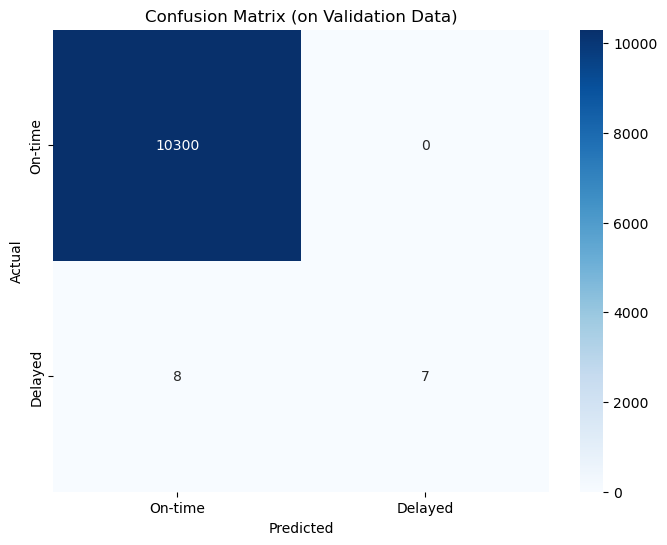

In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

preprocessed_binary_train_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/preprocessed_binary_train.csv"
train_data = pd.read_csv(preprocessed_binary_train_file)

train_data['binary_delay'] = train_data['delay_duration'].apply(lambda x: 0 if x == 0 else 1)

X = train_data.drop(columns=['delay_duration', 'binary_delay'])
y = train_data['binary_delay']

print("Missing values in X:", X.isnull().sum().sum())


numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_columns] = X[numerical_columns].fillna(X[numerical_columns].median())

categorical_columns = ['iataCode', 'icaoCode', 'name']
X[categorical_columns] = X[categorical_columns].fillna('Unknown')

print("Missing values after handling:", X.isnull().sum().sum())

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print("Accuracy: ", accuracy_score(y_val, y_pred))
print("Precision: ", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['On-time', 'Delayed'], yticklabels=['On-time', 'Delayed'])
plt.title('Confusion Matrix (on Validation Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


----- MULTI-CLASS CLASSIFICATION-----

In [242]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define categorical and numerical columns
categorical_columns = ['iataCode', 'icaoCode', 'name']
numerical_columns = [
    'max_temperature_f', 'average_temperature_f', 'min_temperature_f',
    'max_dew_point_f', 'average_dew_point_f', 'min_dew_point_f',
    'max_humidity_%', 'average_humidity_%', 'min_humidity_%',
    'max_wind_speed_mph', 'average_wind_speed_mph', 'min_wind_speed_mph',
    'max_pressure_in', 'average_pressure_in', 'min_pressure_in'
]
datetime_columns = ['scheduledTime', 'actualTime', 'estimatedRunway', 'actualRunway']

# Function to categorize delay_duration into multi-class labels
def categorize_delay(duration):
    if duration == 0:
        return 0  # No Delay
    elif duration < 45:
        return 1  # Short Delay
    elif 45 <= duration <= 175:
        return 2  # Moderate Delay
    else:
        return 3  # Long Delay

def preprocess_data(input_file, output_file, label_encoders=None, scaler=None, is_train=True):

    data = pd.read_csv(input_file)
    print(f"\n--- Preprocessing {input_file} ---")

    data['delay_category'] = data['delay_duration'].apply(categorize_delay)

    for column in data.columns:
        if column in categorical_columns:
            data[column].fillna('Unknown', inplace=True)
        elif column in numerical_columns:
            data[column].fillna(data[column].median(), inplace=True)

    if is_train:
        label_encoders = {}
        for col in categorical_columns:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
            label_encoders[col] = le
    else:
        for col in categorical_columns:
            le = label_encoders[col]
            data[col] = data[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

    for col in datetime_columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')  # Convert to datetime format

        data[col + '_hour'] = data[col].dt.hour
        data[col + '_day'] = data[col].dt.day
        data[col + '_month'] = data[col].dt.month
        data[col + '_weekday'] = data[col].dt.weekday
        
        data.drop(columns=[col], inplace=True)

    if is_train:
        scaler = StandardScaler()
        data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
    else:
        data[numerical_columns] = scaler.transform(data[numerical_columns])

    data.to_csv(output_file, index=False)
    print(f"Preprocessed data saved to {output_file}")

    return label_encoders, scaler

filtered_train_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/filtered_train.csv"
preprocessed_multi_train_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/preprocessed_multi_train.csv"
filtered_test_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/filtered_test.csv"
preprocessed_multi_test_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/preprocessed_multi_test.csv"

label_encoders, scaler = preprocess_data(filtered_train_file, preprocessed_multi_train_file, is_train=True)

preprocess_data(filtered_test_file, preprocessed_multi_test_file, label_encoders=label_encoders, scaler=scaler, is_train=False)



--- Preprocessing C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/filtered_train.csv ---
Preprocessed data saved to C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/preprocessed_multi_train.csv

--- Preprocessing C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/filtered_test.csv ---
Preprocessed data saved to C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/preprocessed_multi_test.csv


({'iataCode': LabelEncoder(),
  'icaoCode': LabelEncoder(),
  'name': LabelEncoder()},
 StandardScaler())

Accuracy: 73.548982093
Precision: 0.71783013
Recall: 0.6590332
F1 Score: 0.65942
Confusion Matrix:
 [[10300     0]
 [    8     7]]


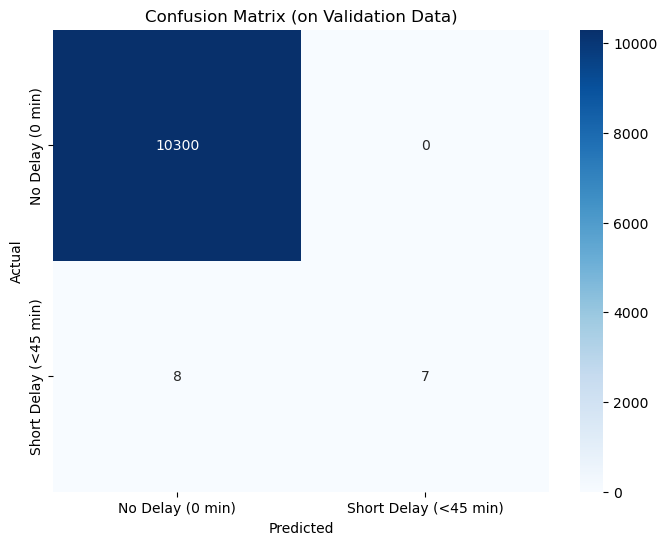

In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

preprocessed_multi_train_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/preprocessed_multi_train.csv"
train_data = pd.read_csv(preprocessed_multi_train_file)

train_data['delay_category'] = train_data['delay_category'].apply(
    lambda x: 'No Delay (0 min)' if x == 0 else 
              'Short Delay (<45 min)' if x < 45 else 
              'Moderate Delay (45–175 min)' if x < 175 else 'Long Delay (>175 min)'
)

X = train_data.drop(columns=['delay_category', 'delay_duration'])
y = train_data['delay_category']

numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_columns] = X[numerical_columns].fillna(X[numerical_columns].median())

categorical_columns = ['iataCode', 'icaoCode', 'name']
X[categorical_columns] = X[categorical_columns].fillna('Unknown')

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print("Accuracy: ", accuracy_score(y_val, y_pred) )
print("Precision: ", precision_score(y_val, y_pred, average='weighted') )
print("Recall: ", recall_score(y_val, y_pred, average='weighted'))
print("F1 Score: ", f1_score(y_val, y_pred, average='weighted'))

print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))



conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (on Validation Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


2. --------------- REGRESSION --------------

Mean Absolute Error (MAE): 0.0224
Root Mean Squared Error (RMSE): 0.5129
Cross-Validation Mean Absolute Error (MAE): 0.0330


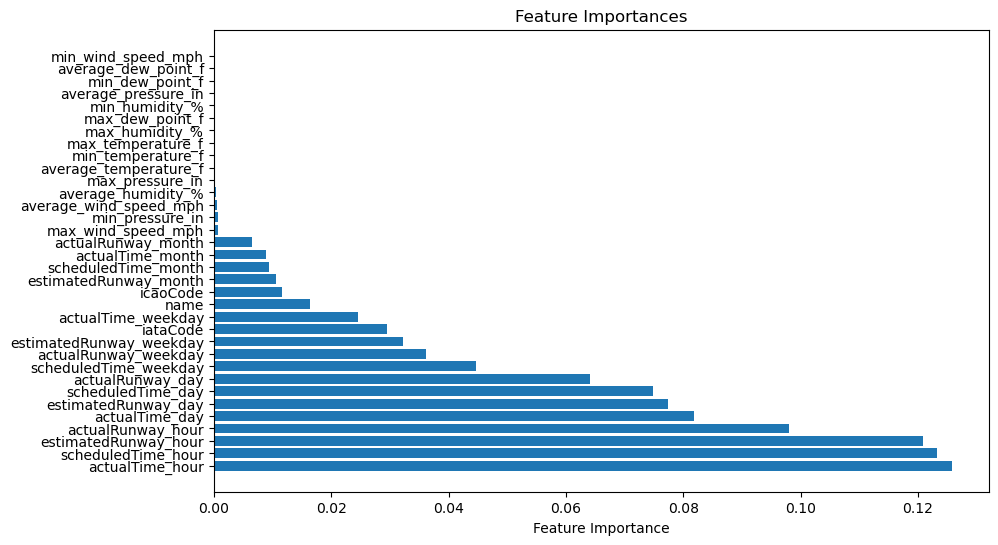

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

preprocessed_train_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/preprocessed_multi_train.csv"
train_data = pd.read_csv(preprocessed_train_file)

X = train_data.drop(columns=['delay_duration', 'delay_category'])
y = train_data['delay_duration']


numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_columns] = X[numerical_columns].fillna(X[numerical_columns].median())

categorical_columns = ['iataCode', 'icaoCode', 'name']
X[categorical_columns] = X[categorical_columns].fillna('Unknown')

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


regressor = RandomForestRegressor(n_estimators=100, random_state=42)


regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_val)


mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

cv_scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-Validation Mean Absolute Error (MAE): {-cv_scores.mean():.4f}")

importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.show()


---- PHASE 4 ------------

In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split

preprocessed_binary_train_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/preprocessed_binary_train.csv"
train_data = pd.read_csv(preprocessed_binary_train_file)

train_data['binary_delay'] = train_data['delay_duration'].apply(lambda x: 0 if x == 0 else 1)

X = train_data.drop(columns=['delay_duration', 'binary_delay'])
y = train_data['binary_delay']

print("Missing values in X:", X.isnull().sum().sum())
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_columns] = X[numerical_columns].fillna(X[numerical_columns].median())
categorical_columns = ['iataCode', 'icaoCode', 'name']
X[categorical_columns] = X[categorical_columns].fillna('Unknown')
print("Missing values after handling:", X.isnull().sum().sum())

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_val)
print("\nBinary Classification Results:")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy: ", accuracy_score(y_val, y_pred) )
print("Precision: ",precision_score(y_val, y_pred, average='weighted') )
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


Missing values in X: 246984
Missing values after handling: 0
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Binary Classification Results:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 78.8765666668
Precision: 0.8798797779
Recall: 0.4666666666666667
F1 Score: 0.6363636363636364
Confusion Matrix:
 [[10300     0]
 [    8     7]]


In [40]:
from sklearn.metrics import classification_report

preprocessed_multi_train_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/preprocessed_multi_train.csv"
train_data = pd.read_csv(preprocessed_multi_train_file)

X = train_data.drop(columns=['delay_duration', 'delay_category'])
y = train_data['delay_category']

print("Missing values in X:", X.isnull().sum().sum())
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_columns] = X[numerical_columns].fillna(X[numerical_columns].median())
categorical_columns = ['iataCode', 'icaoCode', 'name']
X[categorical_columns] = X[categorical_columns].fillna('Unknown')
print("Missing values after handling:", X.isnull().sum().sum())

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_val)
print("\nMulti-Class Classification Results:")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy: ",accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Missing values in X: 246984
Missing values after handling: 0
Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\Users\GB\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



Multi-Class Classification Results:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 79.56677433335

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10300
           1       1.00      0.47      0.64        15

    accuracy                           1.00     10315
   macro avg       1.00      0.73      0.82     10315
weighted avg       1.00      1.00      1.00     10315



In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

preprocessed_regression_train_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/preprocessed_multi_train.csv"
train_data = pd.read_csv(preprocessed_regression_train_file)

X = train_data.drop(columns=['delay_duration', 'delay_category'])
y = train_data['delay_duration']

print("Missing values in X:", X.isnull().sum().sum())

numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_columns] = X[numerical_columns].fillna(X[numerical_columns].median())

categorical_columns = ['iataCode', 'icaoCode', 'name']
X[categorical_columns] = X[categorical_columns].fillna('Unknown')

print("Missing values after handling:", X.isnull().sum().sum())

le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'fit_intercept': [True, False]
}

lin_reg = LinearRegression()

grid_search = GridSearchCV(lin_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_lin_reg = grid_search.best_estimator_

y_pred = best_lin_reg.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print("\nLinear Regression Results:")
print("Best Parameters:", grid_search.best_params_)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Missing values in X: 246984
Missing values after handling: 0
Fitting 5 folds for each of 2 candidates, totalling 10 fits

Linear Regression Results:
Best Parameters: {'fit_intercept': False}
Mean Absolute Error (MAE): 0.0354
Root Mean Squared Error (RMSE): 0.5319


----- PHASE 5 --------

In [15]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Load the preprocessed binary classification train data
preprocessed_binary_train_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/preprocessed_binary_train.csv"
train_data = pd.read_csv(preprocessed_binary_train_file)

# Create a binary target variable based on delay_duration
train_data['binary_delay'] = train_data['delay_duration'].apply(lambda x: 0 if x == 0 else 1)

# Separate features (X) and target (y) for binary classification
X = train_data.drop(columns=['delay_duration', 'binary_delay'])
y = train_data['binary_delay']

# Handle missing values
print("Missing values in X:", X.isnull().sum().sum())

numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_columns] = X[numerical_columns].fillna(X[numerical_columns].median())

categorical_columns = ['iataCode', 'icaoCode', 'name']
X[categorical_columns] = X[categorical_columns].fillna('Unknown')

print("Missing values after handling:", X.isnull().sum().sum())

# Split the data into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model using the best parameters
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_

# Now, load the test data for Phase 5
preprocessed_binary_test_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/preprocessed_binary_test.csv"
test_data = pd.read_csv(preprocessed_binary_test_file)

# Handle missing values for the test data
test_data[numerical_columns] = test_data[numerical_columns].fillna(test_data[numerical_columns].median())
test_data[categorical_columns] = test_data[categorical_columns].fillna('Unknown')

# Separate features (X) for test data
X_test = test_data.drop(columns=['delay_duration', 'binary_delay'], errors='ignore')  # Adjust according to actual columns

# Make predictions on the test data
y_pred_test = best_clf.predict(X_test)

# Prepare the submission file
submission_df = pd.DataFrame({
    'ID': test_data.index + 1,  # Assuming ID starts from 1
    'Delay': ['Delayed' if pred == 1 else 'On-time' for pred in y_pred_test]  # Binary classification result
})

# Save to CSV
submission_file = "submission_binary_classification.csv"
submission_df.to_csv(submission_file, index=False)

# Print confirmation
print(f"Predictions saved to {submission_file}")



Missing values in X: 246984
Missing values after handling: 0
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Predictions saved to submission_binary_classification.csv


Missing values in X: 246984
Missing values after handling: 0
Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\Users\GB\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Predictions saved to submission_multi_class_classification.csv


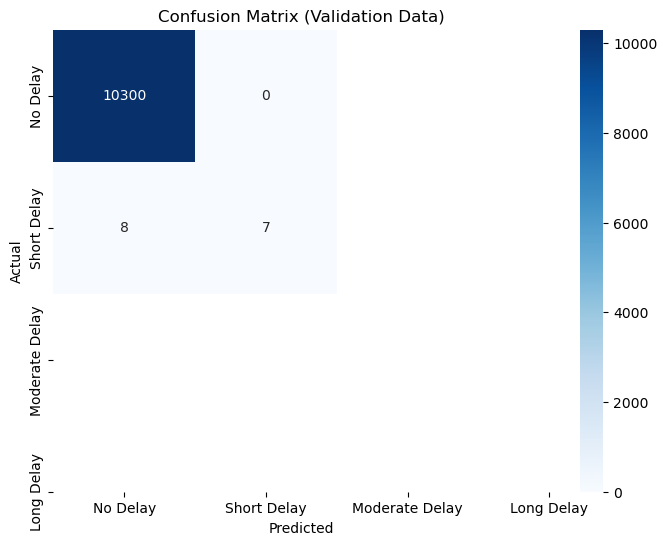


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10300
           1       1.00      0.47      0.64        15

    accuracy                           1.00     10315
   macro avg       1.00      0.73      0.82     10315
weighted avg       1.00      1.00      1.00     10315



In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

preprocessed_multi_train_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/preprocessed_multi_train.csv"
train_data = pd.read_csv(preprocessed_multi_train_file)

X = train_data.drop(columns=['delay_duration', 'delay_category'])
y = train_data['delay_category']

print("Missing values in X:", X.isnull().sum().sum())

numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_columns] = X[numerical_columns].fillna(X[numerical_columns].median())

categorical_columns = ['iataCode', 'icaoCode', 'name']
X[categorical_columns] = X[categorical_columns].fillna('Unknown')

print("Missing values after handling:", X.isnull().sum().sum())

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_

preprocessed_multi_test_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/preprocessed_multi_test.csv"
test_data = pd.read_csv(preprocessed_multi_test_file)

test_data[numerical_columns] = test_data[numerical_columns].fillna(test_data[numerical_columns].median())
test_data[categorical_columns] = test_data[categorical_columns].fillna('Unknown')

X_test = test_data.drop(columns=['delay_duration', 'delay_category'], errors='ignore')  # Adjust according to actual columns

y_pred_test = best_clf.predict(X_test)

submission_df = pd.DataFrame({
    'ID': test_data.index + 1,  # Assuming ID starts from 1
    'Delay': ['No Delay' if pred == 0 else 
              'Short Delay' if pred == 1 else 
              'Moderate Delay' if pred == 2 else 
              'Long Delay' for pred in y_pred_test]  # Multi-class classification result
})

submission_file = "submission_multi_class_classification.csv"
submission_df.to_csv(submission_file, index=False)

print(f"Predictions saved to {submission_file}")

conf_matrix = confusion_matrix(y_val, best_clf.predict(X_val))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'], yticklabels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'])
plt.title('Confusion Matrix (Validation Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:\n", classification_report(y_val, best_clf.predict(X_val)))


In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

preprocessed_regression_train_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTrainCsv/preprocessed_multi_train.csv"
train_data = pd.read_csv(preprocessed_regression_train_file)

X = train_data.drop(columns=['delay_duration', 'delay_category'])
y = train_data['delay_duration']

print("Missing values in X:", X.isnull().sum().sum())

numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_columns] = X[numerical_columns].fillna(X[numerical_columns].median())

categorical_columns = ['iataCode', 'icaoCode', 'name']
X[categorical_columns] = X[categorical_columns].fillna('Unknown')

print("Missing values after handling:", X.isnull().sum().sum())

le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'fit_intercept': [True, False]
}

lin_reg = LinearRegression()

grid_search = GridSearchCV(lin_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_lin_reg = grid_search.best_estimator_

y_pred = best_lin_reg.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print("\nLinear Regression Results:")
print("Best Parameters:", grid_search.best_params_)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

preprocessed_regression_test_file = "C:/Users/GB/Documents/ML-Proj-Dataset/MergeTestCsv/preprocessed_multi_test.csv"
test_data = pd.read_csv(preprocessed_regression_test_file)

test_data[numerical_columns] = test_data[numerical_columns].fillna(test_data[numerical_columns].median())
test_data[categorical_columns] = test_data[categorical_columns].fillna('Unknown')

for col in categorical_columns:
    unseen_labels = set(test_data[col]) - set(le.classes_)
    
    if unseen_labels:
        le.classes_ = np.append(le.classes_, list(unseen_labels))  # Add unseen labels to the encoder
    test_data[col] = le.transform(test_data[col])

test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

X_test = test_data.drop(columns=['delay_duration', 'delay_category'], errors='ignore')

y_pred_test = best_lin_reg.predict(X_test)

submission_df = pd.DataFrame({
    'ID': test_data.index + 1,  
    'Delay': y_pred_test  
})

submission_file = "submission_regression.csv"
submission_df.to_csv(submission_file, index=False)

print(f"Predictions saved to {submission_file}")


Missing values in X: 246984
Missing values after handling: 0
Fitting 5 folds for each of 2 candidates, totalling 10 fits

Linear Regression Results:
Best Parameters: {'fit_intercept': False}
Mean Absolute Error (MAE): 0.0354
Root Mean Squared Error (RMSE): 0.5319
Predictions saved to submission_regression.csv
